In [2]:
import pandas as pd

data = pd.read_csv("fundamental_clean.csv")

In [3]:
columns = ["Asset","Year","Return on Equity %","Earnings Per Share INR"]
data[columns].head()

,Asset,Year,Return on Equity %,Earnings Per Share INR
0,GLAXO,2006,51.07,65.05
1,GLAXO,2007,42.35,64.64
2,GLAXO,2008,39.99,69.78
3,GLAXO,2009,30.22,59.96
4,GLAXO,2010,30.00,66.18


In [5]:
years = ["2008","2010","2016","2017"]
years = ["2017"]
df_test = data.loc[data['Year'].isin(years)]
df_test = df_test[columns]
df_test = df_test.reset_index(drop=True)
df_test.head()

,Asset,Year,Return on Equity %,Earnings Per Share INR
0,GLAXO,2017,18.19,39.76
1,AARTIIND,2017,25.50,38.45
2,ABB,2017,15.69,1.03
3,ABCAPITAL,2017,9.59,2.41
4,ACC,2017,1.99,0.50


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from scipy.cluster import hierarchy
from sklearn import cluster, datasets, metrics

In [8]:
X1 = df_test
#X1.drop("Asset",axis=1,inplace=True)
#X1.drop("Year",axis=1,inplace=True)
X1 = X1.drop("Asset",axis=1)
X1 = X1.drop("Year",axis=1)
X1.head()

,Return on Equity %,Earnings Per Share INR
0,18.19,39.76
1,25.50,38.45
2,15.69,1.03
3,9.59,2.41
4,1.99,0.50


In [9]:
kmeans = cluster.KMeans(n_clusters=10, random_state=50).fit(X1.values)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [23]:
kmeans_3 = pd.DataFrame(kmeans.labels_,columns=['cluster'])
kmeans_3.head()

,cluster
0,7
1,7
2,5
3,4
4,4


In [11]:
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)

In [25]:
pca = decomposition.PCA(n_components=2).fit(X1)
pca_trans = pca.transform(X1)
pca_trans_df = pd.DataFrame(pca_trans,columns=['pca1','pca2'])
kmeans_3 = pd.concat([kmeans_3,pca_trans_df],axis=1)
assets = pd.DataFrame(df_test,columns=['Asset'])
kmeans_3 = pd.concat([assets,kmeans_3],axis=1)

In [30]:
kmeans_3.loc[kmeans_3['cluster'].isin([3])]

,Asset,cluster,pca1,pca2
19,BAJAJ-AUTO,3,116.877746,-2.552578
22,BAJAJFINSV,3,116.619264,-13.793543
75,GSKCONS,3,131.577897,-7.170387
82,HEROMOTOCO,3,156.635995,5.548489
125,NESTLEIND,3,104.459135,10.723167
144,SANOFI,3,116.517743,-11.645592
182,WABCOINDIA,3,87.670220,-7.060677


In [29]:
pca.components_[0]

array([ 0.12068295,  0.9926911 ])

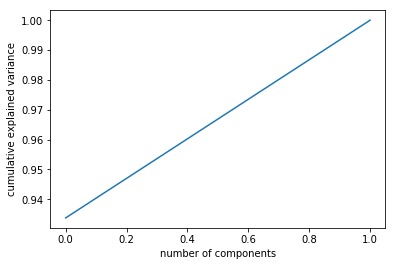

In [48]:
import numpy as np
#Explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

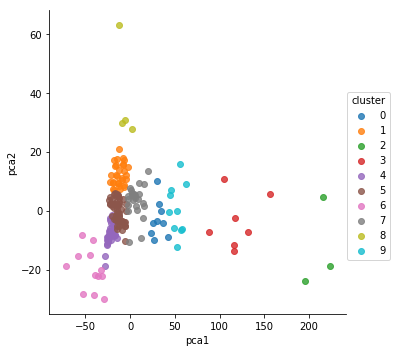

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.lmplot(x='pca1',y='pca2',data=kmeans_3,hue='cluster',fit_reg=False)
plt.show()